# ANN 과 CNN 의 성능차이 비교하기
## ANN

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [2]:
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8788 - loss: 0.4359 - val_accuracy: 0.9614 - val_loss: 0.1310
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9671 - loss: 0.1145 - val_accuracy: 0.9716 - val_loss: 0.0930
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0718 - val_accuracy: 0.9733 - val_loss: 0.0851
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9844 - loss: 0.0530 - val_accuracy: 0.9751 - val_loss: 0.0832
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0395 - val_accuracy: 0.9778 - val_loss: 0.0747
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9781 - val_loss: 0.0729
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9924 - loss: 0.0243 - val_accuracy: 0.9774 - val_loss: 0.0774
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9944 - loss: 0.0193 - val_accurac

In [3]:
atest_loss, atest_accuracy = model.evaluate(x_test, y_test)
print(f"ANN Test loss {atest_loss}")
print(f"ANN Test Accuracy {atest_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9751 - loss: 0.0946
ANN Test loss 0.08420741558074951
ANN Test Accuracy 0.9782999753952026


## CNN

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPool2D((2, 2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9088 - loss: 0.3239 - val_accuracy: 0.9731 - val_loss: 0.0851
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0657 - val_accuracy: 0.9833 - val_loss: 0.0527
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9877 - loss: 0.0402 - val_accuracy: 0.9822 - val_loss: 0.0516
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.9824 - val_loss: 0.0590
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9937 - loss: 0.0200 - val_accuracy: 0.9869 - val_loss: 0.0450
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9850 - val_loss: 0.0532
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9859 - val_loss: 0.0448
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accurac

In [5]:
ctest_loss, ctest_accuracy = model.evaluate(x_test, y_test)
print(f"CNN Test loss {ctest_loss}")
print(f"CNN Test Accuracy {ctest_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9839 - loss: 0.0684
CNN Test loss 0.05079073831439018
CNN Test Accuracy 0.9879999756813049


## Mnist 데이터 EDA 및 ANN, CNN 풀 코드

In [6]:
import numpy as np

(x_train, L_train), (x_test, L_test) = mnist.load_data()

print(f"\n train shape = {x_train.shape}, Label shape = {L_train.shape}")
print(f"test shape = {x_test.shape}, Label shape = {L_test.shape}")

print(f"\n train Label = {L_train}")
print(f" test Label(L_test) = {L_test}")


 train shape = (60000, 28, 28), Label shape = (60000,)
test shape = (10000, 28, 28), Label shape = (10000,)

 train Label = [5 0 4 ... 5 6 8]
 test Label(L_test) = [7 2 1 ... 4 5 6]


In [7]:
first_data_train = x_train[0]

for row in first_data_train:
    for pixel in row:
        print(f"{pixel:3d}", end=" ")
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [8]:
first_data_test = x_test[0]

for row in first_data_test:
    for pixel in row:
        print(f"{pixel:3d}", end=" ")
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 198 198 170  52   0   0 

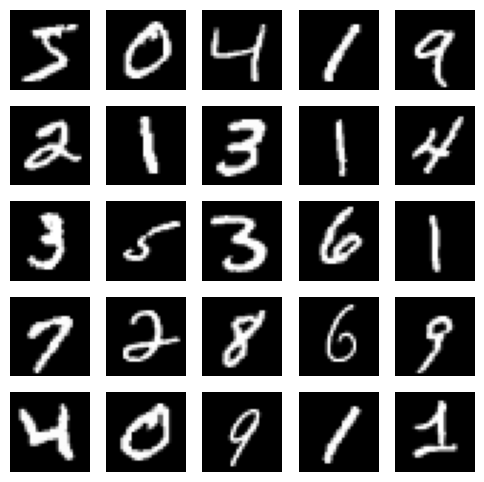

In [9]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6))

for index in range(25):

    plt.subplot(5, 5, index + 1)
    plt.imshow(x_train[index], cmap="gray")
    plt.axis("off")

plt.show()

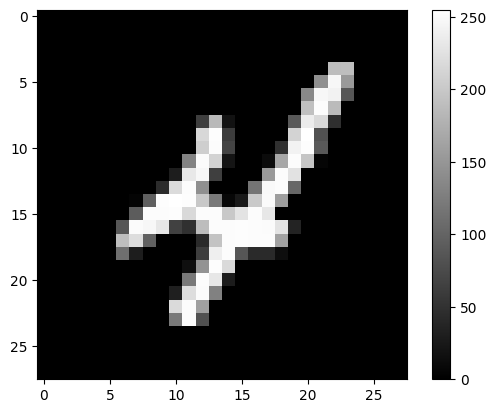

In [10]:
plt.imshow(x_train[9], cmap="gray")
plt.colorbar()
plt.show()

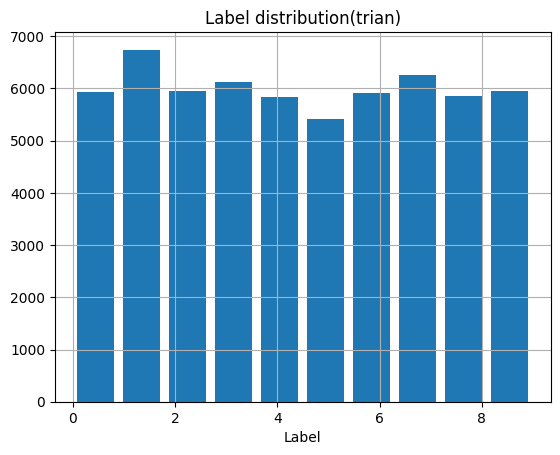

In [11]:
plt.title("Label distribution(trian)")
plt.grid()
plt.xlabel("Label")

plt.hist(L_train, bins=10, rwidth=0.8)

plt.show()

In [12]:
# 학습데이터 정답 분포 확인
label_distribution = np.zeros(10)

for i in range(len(L_train)):
    label = int(L_train[i])

    label_distribution[label] = label_distribution[label] + 1

print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# 원핫 인코딩
L_train = tf.keras.utils.to_categorical(L_train, num_classes=10)
L_test = tf.keras.utils.to_categorical(L_test, num_classes=10)

## ANN 모델

In [24]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
ModelFit = model.fit(x_train, L_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4932 - loss: 1.8954 - val_accuracy: 0.8082 - val_loss: 0.8164
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8254 - loss: 0.7230 - val_accuracy: 0.8691 - val_loss: 0.5212
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8685 - loss: 0.5075 - val_accuracy: 0.8897 - val_loss: 0.4204
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8898 - loss: 0.4166 - val_accuracy: 0.8971 - val_loss: 0.3733
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8981 - loss: 0.3772 - val_accuracy: 0.9021 - val_loss: 0.3479
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9057 - loss: 0.3429 - val_accuracy: 0.9066 - val_loss: 0.3277
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9080 - loss: 0.3304 - val_accuracy: 0.9104 - val_loss: 0.3169
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9107 - loss: 0.3182 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, L_test)

print(f"test loss : {test_loss}")
print(f"test accuracy {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.9335 - loss: 0.2265
test loss : 0.19984500110149384
test accuracy " 0.9426000118255615


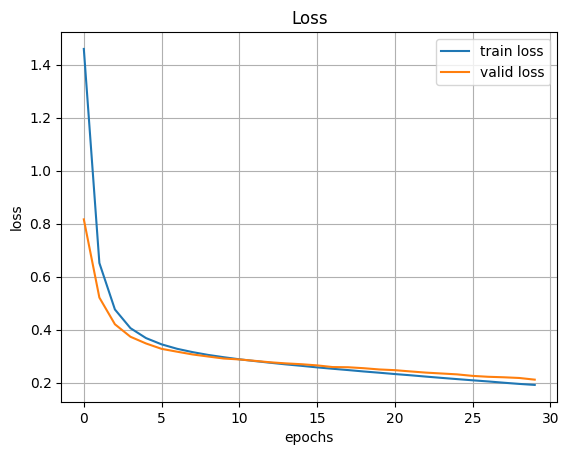

In [ ]:
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(ModelFit.history["loss"], label="train loss")
plt.plot(ModelFit.history["val_loss"], label="valid loss")

plt.legend(loc="best")

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


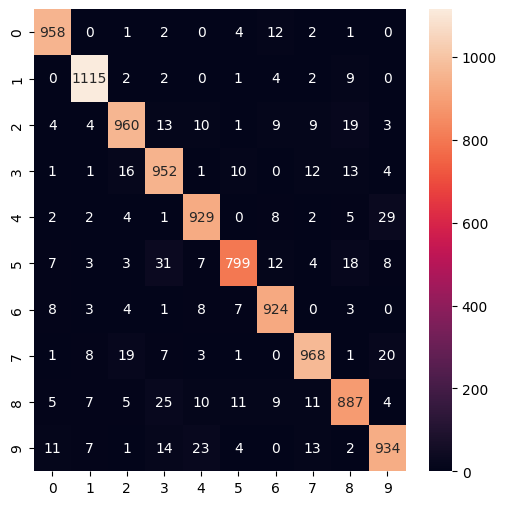

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

Cmatrix = confusion_matrix(
    np.argmax(L_test, axis=1), np.argmax(predicted_value, axis=1)
)

sns.heatmap(Cmatrix, annot=True, fmt="d")
plt.show()

In [30]:
predicted_value = np.round(predicted_value)
predicted_value = predicted_value.astype(int)
print(predicted_value)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
print(Cmatrix)
print("\n")

for i in range(10):
    print(
        (
            f"label = {i}\t ({np.max(Cmatrix[i])}/{np.sum(Cmatrix[i])})\taccuracy = {np.sum(Cmatrix[i]):.3f}"
        )
    )

[[ 958    0    1    2    0    4   12    2    1    0]
 [   0 1115    2    2    0    1    4    2    9    0]
 [   4    4  960   13   10    1    9    9   19    3]
 [   1    1   16  952    1   10    0   12   13    4]
 [   2    2    4    1  929    0    8    2    5   29]
 [   7    3    3   31    7  799   12    4   18    8]
 [   8    3    4    1    8    7  924    0    3    0]
 [   1    8   19    7    3    1    0  968    1   20]
 [   5    7    5   25   10   11    9   11  887    4]
 [  11    7    1   14   23    4    0   13    2  934]]


label = 0	 (958/980)	accuracy = 980.000
label = 1	 (1115/1135)	accuracy = 1135.000
label = 2	 (960/1032)	accuracy = 1032.000
label = 3	 (952/1010)	accuracy = 1010.000
label = 4	 (929/982)	accuracy = 982.000
label = 5	 (799/892)	accuracy = 892.000
label = 6	 (924/958)	accuracy = 958.000
label = 7	 (968/1028)	accuracy = 1028.000
label = 8	 (887/974)	accuracy = 974.000
label = 9	 (934/1009)	accuracy = 1009.000


In [34]:
# 모델 저장
model.save("my_model.keras", include_optimizer=False)

In [98]:
from PIL import Image

# 모델 불러오기
model = tf.keras.models.load_model("my_model.keras")

In [99]:
# 실제 이미지 파일 불러오기
num = {
    0: "one",
    1: "two",
    2: "three",
    3: "four",
    4: "five",
    5: "six",
    6: "seven",
    7: "eight",
    8: "nine",
}
for i in range(9):
    img = Image.open(f"numbers/{num[i]}.png").convert("L")

    img = img.resize((28, 28))

    input_data = np.array(img)

    input_data = (255 - input_data) / 255.0

    input_data = np.expand_dims(input_data, axis=0)

    # 모델을 사용하여 예측 수행
    prediction = model.predict(input_data)

    # 예측 결과 출력
    print(f"Predicted digit : {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted digit : 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted digit : 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted digit : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted digit : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted digit : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted digit : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted digit : 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted digit : 3


In [77]:
# 모델을 사용하여 예측 수행
prediction = model.predict(input_data)

# 예측 결과 출력
print(f"Predicted digit : {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted digit : 3


## CNN 모델

In [79]:
(x_train, L_train), (x_test, L_test) = mnist.load_data()
# 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN 입력용 reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 원-핫 인코딩
L_train = tf.keras.utils.to_categorical(L_train, num_classes=10)
L_test = tf.keras.utils.to_categorical(L_test, num_classes=10)

# 모델 구성 (CNN 으로 변경)
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# 학습
model.fit(x_train, L_train, epochs=30, batch_size=32, validation_split=0.3)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8728 - loss: 0.4096 - val_accuracy: 0.9782 - val_loss: 0.0730
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9807 - loss: 0.0612 - val_accuracy: 0.9819 - val_loss: 0.0613
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9870 - loss: 0.0387 - val_accuracy: 0.9851 - val_loss: 0.0492
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9906 - loss: 0.0291 - val_accuracy: 0.9855 - val_loss: 0.0483
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9943 - loss: 0.0187 - val_accuracy: 0.9852 - val_loss: 0.0554
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9879 - val_loss: 0.0423
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9957 - loss: 0.0126 - val_accuracy: 0.9863 - val_loss: 0.0544
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9964 - loss: 0.0103 - 

In [50]:
# 평가
test_loss, test_accuracy = model.evaluate(x_test, L_test)
print(f"Test Loss : {test_loss}")
print(f"Test Accuracy : {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0826
Test Loss : 0.06628603488206863
Test Accuracy : 0.9891999959945679


In [51]:
# 모델 저장
model.save("my_model_CNN.h5")

In [5]:
from PIL import Image
import numpy as np

# 모델 불러오기
model = tf.keras.models.load_model("my_model_CNN.h5")

NameError: name 'tf' is not defined

In [102]:
# 실제 이미지 파일 불러오기
num = {
    0: "one",
    1: "two",
    2: "three",
    3: "four",
    4: "five",
    5: "six",
    6: "seven",
    7: "eight",
    8: "nine",
}
for i in range(9):
    img = Image.open(f"numbers/{num[i]}.png").convert("L")

    img = img.resize((28, 28))

    input_data = np.array(img)

    input_data = (255 - input_data) / 255.0

    input_data = np.expand_dims(input_data, axis=0)

    # 모델을 사용하여 예측 수행
    prediction = model.predict(input_data)

    # 예측 결과 출력
    print(f"Predicted digit : {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted digit : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted digit : 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted digit : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted digit : 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted digit : 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted digit : 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit : 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted digit : 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted digit : 9


## 파이토치 로 CNN 모델 사용하기

In [87]:
%pip install torchvision

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 15.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Using device: cuda
Epoch [1/30], Train Loss: 0.1592, Train Acc: 95.21%, Test Loss: 0.0532, Test Acc: 98.13%
Best model saved with Test Accuracy: 98.13% at Epoch 1
Epoch [2/30], Train Loss: 0.0470, Train Acc: 98.54%, Test Loss: 0.0472, Test Acc: 98.50%
Best model saved with Test Accuracy: 98.50% at Epoch 2
Epoch [3/30], Train Loss: 0.0316, Train Acc: 99.00%, Test Loss: 0.0364, Test Acc: 98.82%
Best model saved with Test Accuracy: 98.82% at Epoch 3
Epoch [4/30], Train Loss: 0.0240, Train Acc: 99.23%, Test Loss: 0.0276, Test Acc: 99.03%
Best model saved with Test Accuracy: 99.03% at Epoch 4
Epoch [5/30], Train Loss: 0.0200, Train Acc: 99.36%, Test Loss: 0.0262, Test Acc: 99.10%
Best model saved with Test Accuracy: 99.10% at Epoch 5
Epoch [6/30], Train Loss: 0.0142, Train Acc: 99.54%, Test Loss: 0.0254, Test Acc: 99.27%
Best model saved with Test Accuracy: 99.27% at Epoch 6
Epoch [7/30], Train Loss: 0.0115, Train Acc: 99.63%, Test Loss: 0.0230, Test Acc: 99.29%
Best model saved with Test A

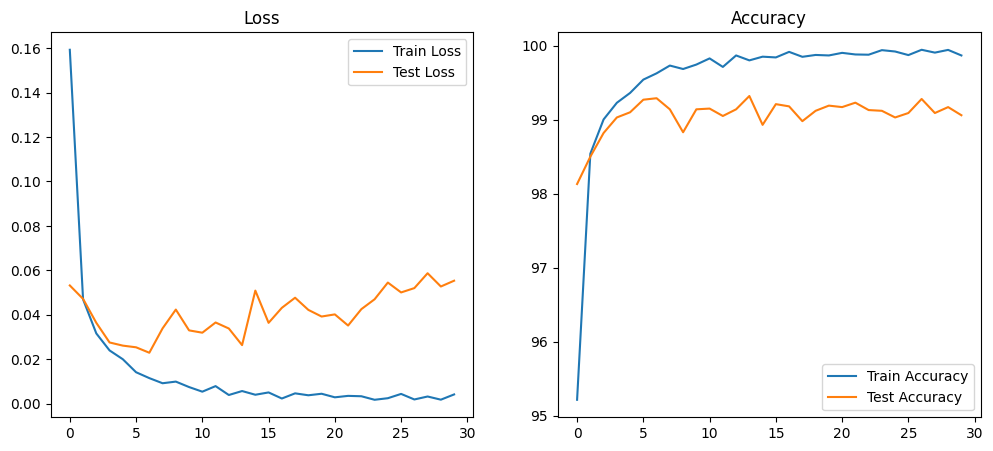

In [2]:
# 1. GPU 사용 여부 확인
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f'Using device: {device}')

# 1. 데이터 로딩 및 전처리
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. 데이터셋과 DataLoader 만들기
# 1. 데이터셋 생성 및 전처리
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# 3. 모델, 손실 함수 및 옵티마이저 정의
model = CNN().to(device)  # 모델을 GPU 실행
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # lr=1e-3


# 4. 학습 함수
def train(model, train_loader, optimizer, loss_fn, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Loss 및 Accuracy 계산
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / len(train_loader)
    accuracy = correct / total * 100

    return avg_loss, accuracy


# 5. 평가 함수
def evaluate(model, test_loader, loss_fn, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_loss = test_loss / len(test_loader)
    accuracy = correct / total * 100

    return avg_loss, accuracy


# 6. 학습 및 평가 수행
# 가중 초기 테스트 정확도를 기록할 때 모델을 저장
num_epochs = 30
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

best_test_acc = 0.0  # 가중 높은 테스트 정확도를 기록하기 위한 변수 (이 부분을 학습 루프 외부에 정의)

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, loss_fn, device)
    test_loss, test_acc = evaluate(model, test_loader, loss_fn, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(
        f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
        f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%"
    )

    # 가중 높은 테스트 정확도를 기록할 때 모델을 저장
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        torch.save(model.state_dict(), f"best_model_epoch_{epoch+1}.pth")  # 모델 저장
        print(
            f"Best model saved with Test Accuracy: {test_acc:.2f}% at Epoch {epoch+1}"
        )


# 7. 성능 평가 결과 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.title("Accuracy")
plt.legend()

plt.show()

모델이 예측한 숫자: 1


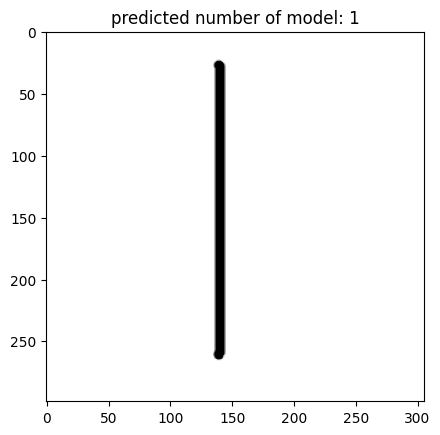

모델이 예측한 숫자: 2


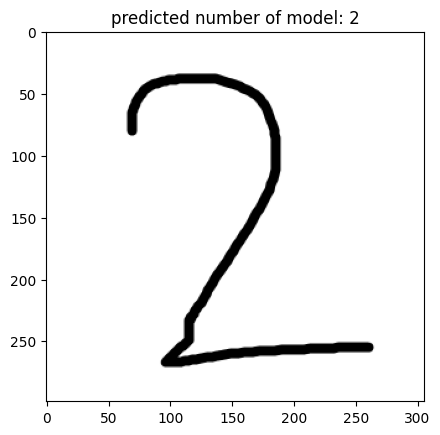

모델이 예측한 숫자: 3


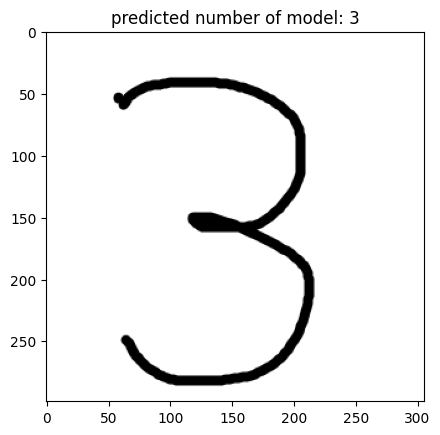

모델이 예측한 숫자: 4


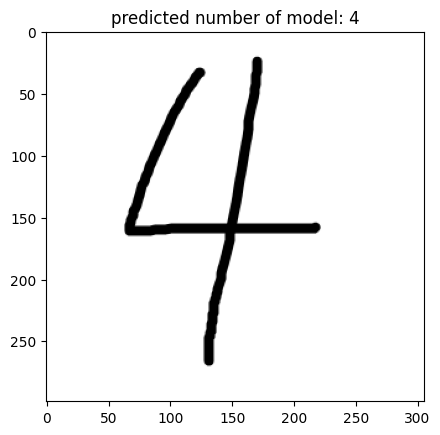

모델이 예측한 숫자: 5


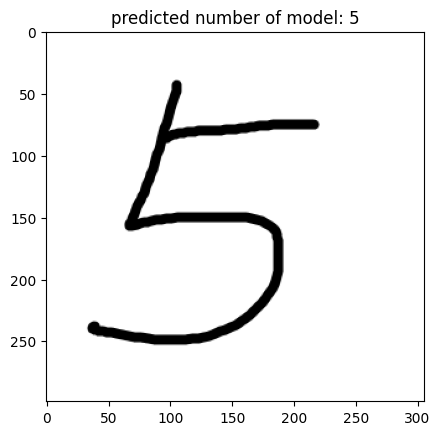

모델이 예측한 숫자: 5


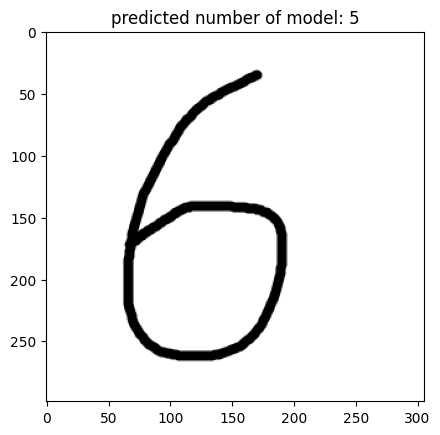

모델이 예측한 숫자: 7


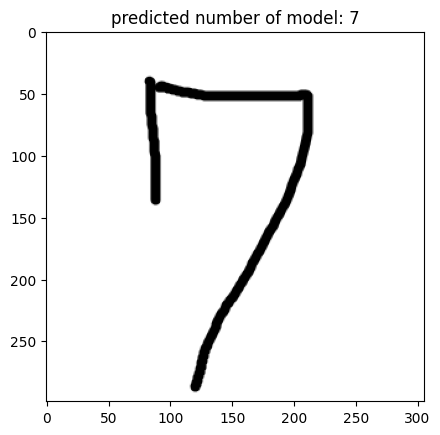

모델이 예측한 숫자: 8


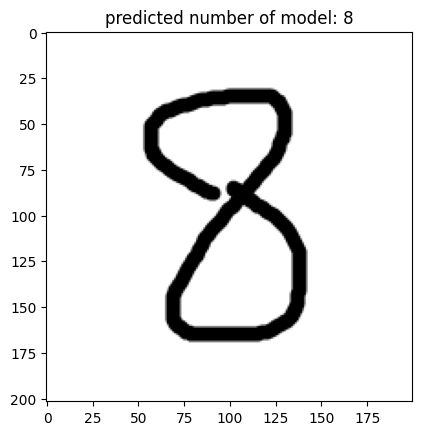

모델이 예측한 숫자: 9


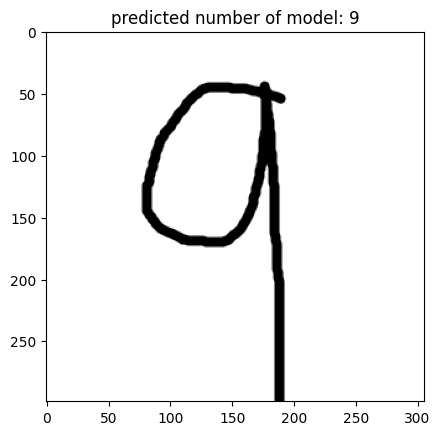

In [12]:
# 새로운 모델 인식된 생성
model = CNN()

# 저장된 모델 가중치만 로딩 (weights_only=True 추가)
# 저장된 모델 파일 경로를 적절히 수정
model.load_state_dict(torch.load("best_model_epoch_7.pth", weights_only=True))
model.eval()


# 이미지를 전처리한 함수 정의 (배경이 흰색이면 반전 필요)
def preprocess_image(image_path):
    # 이미지를 로드 및 흑백으로 변환
    image = Image.open(image_path).convert("L")  # 'L'은 그레이스케일 모드

    # 이미지 전처리 함수 정의 (배경이 어두우며, 검은색으로 반전, 숫자 흰색)
    image = np.array(image)
    image = Image.fromarray(255 - image)

    # MNIST 데이터와 같은 크기로 조정 (28x28)
    transform = transforms.Compose(
        [
            transforms.Resize((28, 28)),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),  # MNIST와 비슷하게 정규화
        ]
    )

    # 이미지 텐서 변환 및 배치 차원 추가 (1, 28, 28)
    image = transform(image).unsqueeze(0)

    return image


# 실제 이미지 파일 불러오기
num = {
    0: "one",
    1: "two",
    2: "three",
    3: "four",
    4: "five",
    5: "six",
    6: "seven",
    7: "eight",
    8: "nine",
}
for i in range(9):
    image_path = f"numbers/b{num[i]}.png"
    img = preprocess_image(image_path)
    with torch.no_grad():
        output = model(img)
        _, predicted = torch.max(output, 1)
        print(f"모델이 예측한 숫자: {predicted.item()}")

    # 이미지 시각화
    plt.imshow(Image.open(image_path).convert("L"), cmap="gray")
    plt.title(f"predicted number of model: {predicted.item()}")
    plt.show()

In [8]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.0%2Bcu118-cp312-cp312-win_amd64.whl.metadata (29 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.0%2Bcu118-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.7.0%2Bcu118-cp312-cp312-win_amd64.whl (2908.4 MB)
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   --- ------------------------------------ 0.5/5.5 MB 2.8 MB/s eta 0:00:02
   ----------- ---------------------------- 1.6/5.5 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 3.7/5.5 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 7.8 MB/s eta 0:00:00
Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.0%2Bcu118-cp312-cp312-win_amd64.whl (4.1 MB)

   ---------------------------------------- 0/3 [torch]
   ---------------------------------------- 0/3 [

In [ ]:
%pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.7.0+cu118
Uninstalling torch-2.7.0+cu118:
  Successfully uninstalled torch-2.7.0+cu118
Found existing installation: torchvision 0.22.0
Uninstalling torchvision-0.22.0:
  Successfully uninstalled torchvision-0.22.0
Found existing installation: torchaudio 2.7.0+cu118
Uninstalling torchaudio-2.7.0+cu118:
  Successfully uninstalled torchaudio-2.7.0+cu118
Note: you may need to restart the kernel to use updated packages.


In [13]:
import torch

print(f"PyTorch 버전: {torch.__version__}")
print(f"CUDA 버전: {torch.version.cuda}")
print(f"cuDNN 버전: {torch.backends.cudnn.version()}")
print(f"CUDA 사용 가능 여부: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"사용 가능한 GPU 개수: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

PyTorch 버전: 2.7.0+cu118
CUDA 버전: 11.8
cuDNN 버전: 90100
CUDA 사용 가능 여부: True
사용 가능한 GPU 개수: 1
GPU 0: NVIDIA GeForce RTX 3070 Ti Laptop GPU


## fashin_mnist 이용한 CNN

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

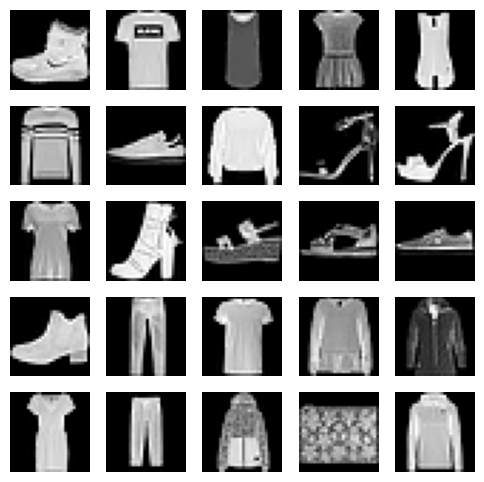

In [33]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6))

for index in range(25):  # 25 개 이미지 출력
    plt.subplot(5, 5, index + 1)  # 5행 5열
    plt.imshow(x_train[index], cmap="gray")
    plt.axis("off")

plt.show()

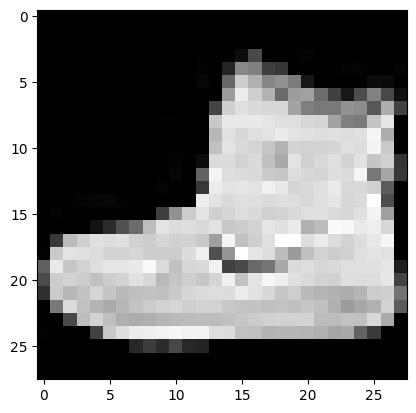

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127 

In [34]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 첫번째 이미지 출력
image = x_train[0]
plt.imshow(image, cmap="gray")
plt.show()

# 행렬별 값 출력
for row in image:
    for pixel in row:
        print(f"{pixel:3d}", end=" ")
    print()

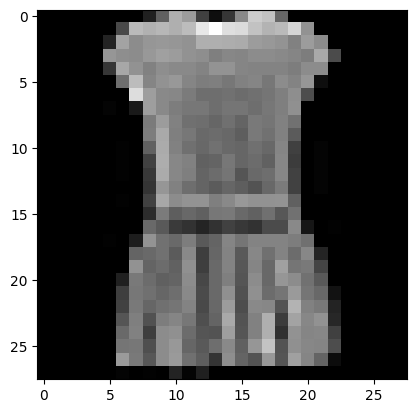

  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0 
  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0 
  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0 
  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0 
  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0 
  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0 
  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 100 121 117 129 114   0   0   0   0 

In [35]:
# 네 번째 이미지 출력 해보기
image = x_train[3]
plt.imshow(image, cmap="gray")
plt.show()

# 행렬별 값 출력
for row in image:
    for pixel in row:
        print(f"{pixel:3d}", end=" ")
    print()

In [56]:
cnn = Sequential()
cnn.add(Input(shape=(28, 28, 1)))
cnn.add(Conv2D(kernel_size=(3, 3), filters=32, activation="relu"))
cnn.add(Conv2D(kernel_size=(3, 3), filters=64, activation="relu"))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation="softmax"))

In [57]:
cnn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)
cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [59]:
# val_loss가 더 이상 줄어들지 않으면 조기 종료
early_stopping = EarlyStopping(
    monitor="val_loss",  # 모니터할 대상 (val_loss 또는 val_accuracy 등)
    patience=5,  # 몇 epoch 동안 개선 없으면 멈춤
    restore_best_weights=True,  # 가장 좋았던 시점의 가중치로 되돌림
)

hist = cnn.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7360 - loss: 0.7438 - val_accuracy: 0.8814 - val_loss: 0.3261
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8766 - loss: 0.3464 - val_accuracy: 0.8941 - val_loss: 0.2891
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8920 - loss: 0.3009 - val_accuracy: 0.8958 - val_loss: 0.2809
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9063 - loss: 0.2545 - val_accuracy: 0.9135 - val_loss: 0.2401
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9156 - loss: 0.2317 - val_accuracy: 0.9165 - val_loss: 0.2269
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9192 - loss: 0.2157 - val_accuracy: 0.9158 - val_loss: 0.2224
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9251 - loss: 0.2050 - val_accuracy: 0.9139 - val_loss: 0.2301
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9318 - loss: 0.1836 - 

In [61]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9251 - loss: 0.2197


[0.21521081030368805, 0.9262999892234802]

## Drop out 사용시

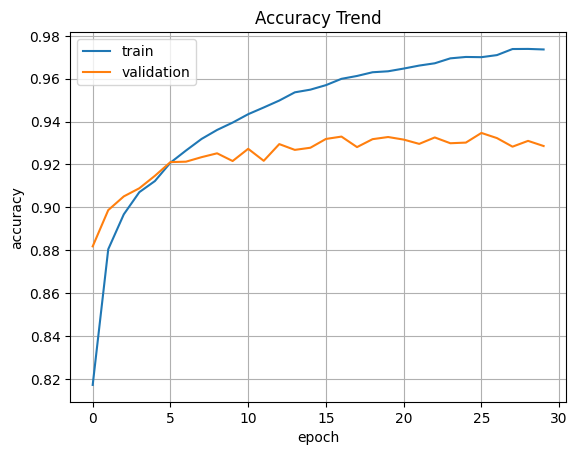

In [47]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy Trend")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()

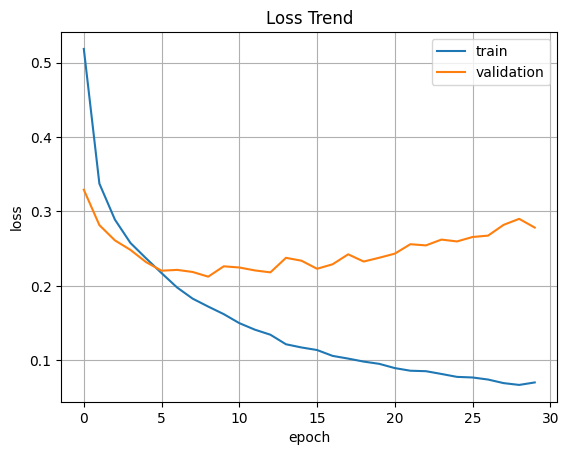

In [48]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss Trend")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()

## Drop out 사용안함

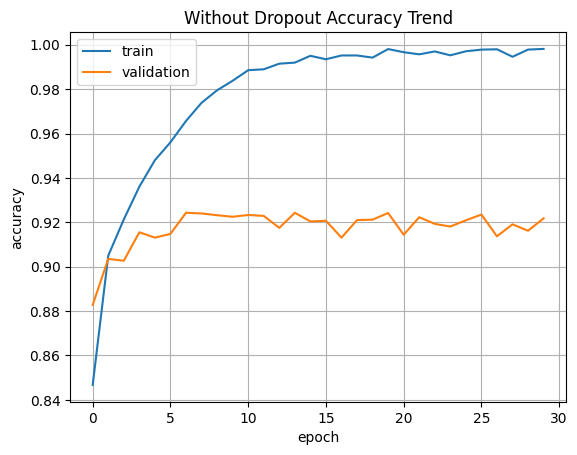

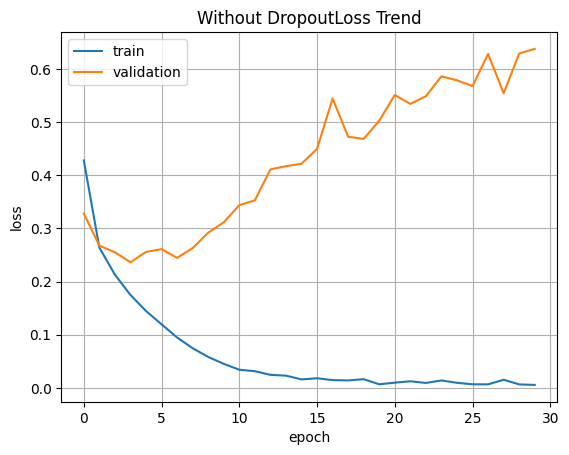

In [55]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Without Dropout Accuracy Trend")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Without DropoutLoss Trend")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()

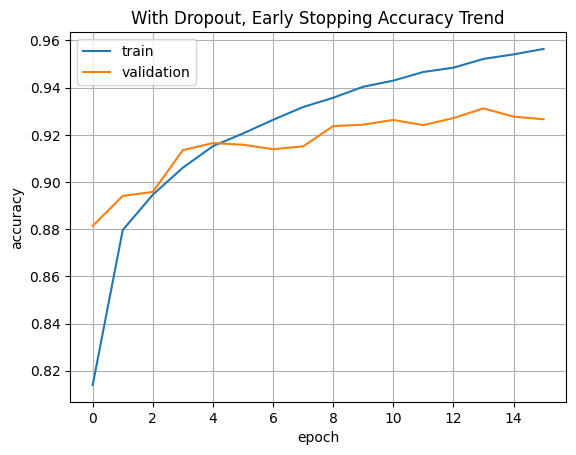

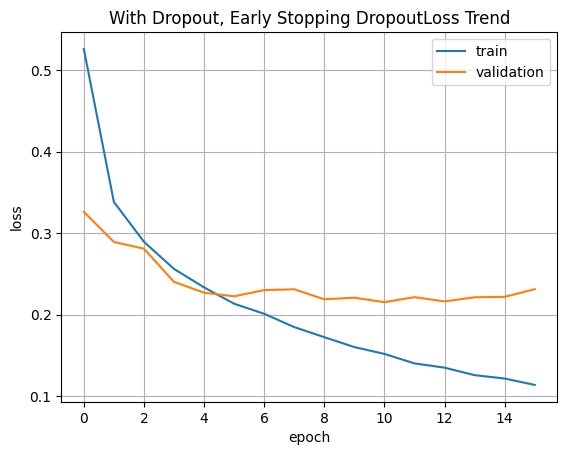

In [60]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("With Dropout, Early Stopping Accuracy Trend")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("With Dropout, Early Stopping DropoutLoss Trend")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()